In [15]:
import pandas as pd
import numpy as np
from snownlp import SnowNLP
import time
import datetime
import json
from PIL import Image
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim import corpora, models
import csv
from sklearn.feature_extraction.text import  CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.feature_extraction.text import  TfidfVectorizer
import matplotlib.pyplot as plt
import re
import jieba

In [16]:
data0 = pd.read_csv("北京高校_1_3.csv")
data = pd.read_csv("北京高校.csv")
df0 = pd.DataFrame()
df = pd.DataFrame()

df0['date'] = pd.to_datetime(data0['发布时间'].apply(lambda x:x[0:10]),format='%Y-%m-%d')
df0['content'] = data0['微博正文']
df['date'] = pd.to_datetime(data['发布时间'].apply(lambda x:x[0:10]),format='%Y-%m-%d')
df['content'] = data['微博正文']
df = pd.concat([df0,df],ignore_index=True,join='inner')
df.sort_values(by=['date'],inplace=True)
df.drop_duplicates(inplace=True)
df

,date,content
0,2022-01-01,2022新年快乐@北京高校联队@捷酷JAKROO@vortex轮组@潘震-自行车教练@战五渣...
575,2022-01-01,#北大跨年灯光秀#【2022｜#北京大学跨年晚会#】新年的钟声已经敲响，崭新的篇章已然翻开。...
826,2022-01-01,新的一年不要爱情不要金钱什么我都不要了求求让我在北京高校录取名单上吧我愿意每个初一都去雍和宫...
827,2022-01-01,#北京大学跨年晚会#在战火纷飞的年代，有一位特殊的民族脊梁，他以锣鼓为矛、粉墨为盾，与敌人...
828,2022-01-01,元旦@北京高校联队
...,...,...
4191,2022-06-01,#小兴播报#【快来报名！“未来城市”启航人全球创新挑战赛正式启动】日前，北京大兴国际机场临空...
4190,2022-06-01,#抗疫北京高校在行动#儿童节快乐和人大志愿者们一起，#过一个有意义的六一#！来源：@中国人民大学
4189,2022-06-01,【#高考加油#，快来查收北大学长学姐们的祝福！】寒窗十载，披星戴月，#高考倒计时6天#，少年...
4187,2022-06-01,1952年，高校院糸调整，浦江清从清华大学调入北京大学。57年暑中，校方按排他去北戴河疗养，...


In [17]:
stopwordlist = []
with open(r"stopwords.txt",'r',encoding="UTF-8") as f:
    for i in f:
        stopwordlist.append(i.strip())
#print(stopwordlist)
def sent2word(line):
    segList = jieba.cut(line,cut_all=False)
    segSentence = ''
    for word in segList:
        if word in stopwordlist:
            continue
        if word != '\t' and len(word)>1:
            segSentence += word + " "
    return segSentence.strip()
df['words'] = df['content'].apply(sent2word)
df.dropna(axis=0,how='any',inplace=True)
df.to_csv('datav2_weibo.csv')
df

,date,content,words
0,2022-01-01,2022新年快乐@北京高校联队@捷酷JAKROO@vortex轮组@潘震-自行车教练@战五渣...,新年快乐 联队 捷酷 JAKROO vortex 轮组 潘震 自行车 教练 战五渣 罗雪 t...
575,2022-01-01,#北大跨年灯光秀#【2022｜#北京大学跨年晚会#】新年的钟声已经敲响，崭新的篇章已然翻开。...,北大 跨年 灯光 北京大学 跨年 晚会 新年 钟声 敲响 崭新 篇章 已然 翻开 回顾 北京...
826,2022-01-01,新的一年不要爱情不要金钱什么我都不要了求求让我在北京高校录取名单上吧我愿意每个初一都去雍和宫...,一年 爱情 金钱 求求 录取名单 初一 雍和宫 烧香 油钱
827,2022-01-01,#北京大学跨年晚会#在战火纷飞的年代，有一位特殊的民族脊梁，他以锣鼓为矛、粉墨为盾，与敌人...,北京大学 跨年 晚会 战火纷飞 年代 一位 民族 脊梁 锣鼓 粉墨 为盾 敌人 誓死 抗争 ...
828,2022-01-01,元旦@北京高校联队,元旦 联队
...,...,...,...
4191,2022-06-01,#小兴播报#【快来报名！“未来城市”启航人全球创新挑战赛正式启动】日前，北京大兴国际机场临空...,小兴 播报 报名 未来 城市 启航 全球 创新 挑战赛 正式 启动 日前 大兴 国际 机场 ...
4190,2022-06-01,#抗疫北京高校在行动#儿童节快乐和人大志愿者们一起，#过一个有意义的六一#！来源：@中国人民大学,抗疫 儿童节 快乐 人大 志愿者 意义 六一 来源 中国人民大学
4189,2022-06-01,【#高考加油#，快来查收北大学长学姐们的祝福！】寒窗十载，披星戴月，#高考倒计时6天#，少年...,高考 加油 查收 学姐 祝福 寒窗 十载 披星戴月 高考 倒计时 少年 以笔 奔赴 战场 听...
4187,2022-06-01,1952年，高校院糸调整，浦江清从清华大学调入北京大学。57年暑中，校方按排他去北戴河疗养，...,1952 调整 浦江 清华大学 调入 北京大学 57 年暑 校方 按排 北戴河 疗养 胃部 ...


In [18]:
dict = {}
words = df['words'].apply(lambda x:jieba.cut(x,cut_all=False))
for line in words:
    for word in line:
        if word in dict.keys():
            dict[word]=dict[word]+1
        else:
            dict[word]=1

w_order=sorted(dict.items(),key=lambda x:x[1],reverse=True)    

w_order10=w_order[:10]#将列表的前十位提取并且遍历 输出key(单词)和values(次数)
for key,values in w_order10:
    print(key,':',values)     

  : 401427
开学 : 3210
疫情 : 2436
毕业生 : 2415
视频 : 2102
冬奥 : 1892
冬奥会 : 1871
工作 : 1863
中国 : 1819
就业 : 1764


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\wordcloud\wordcloud.py:513: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead

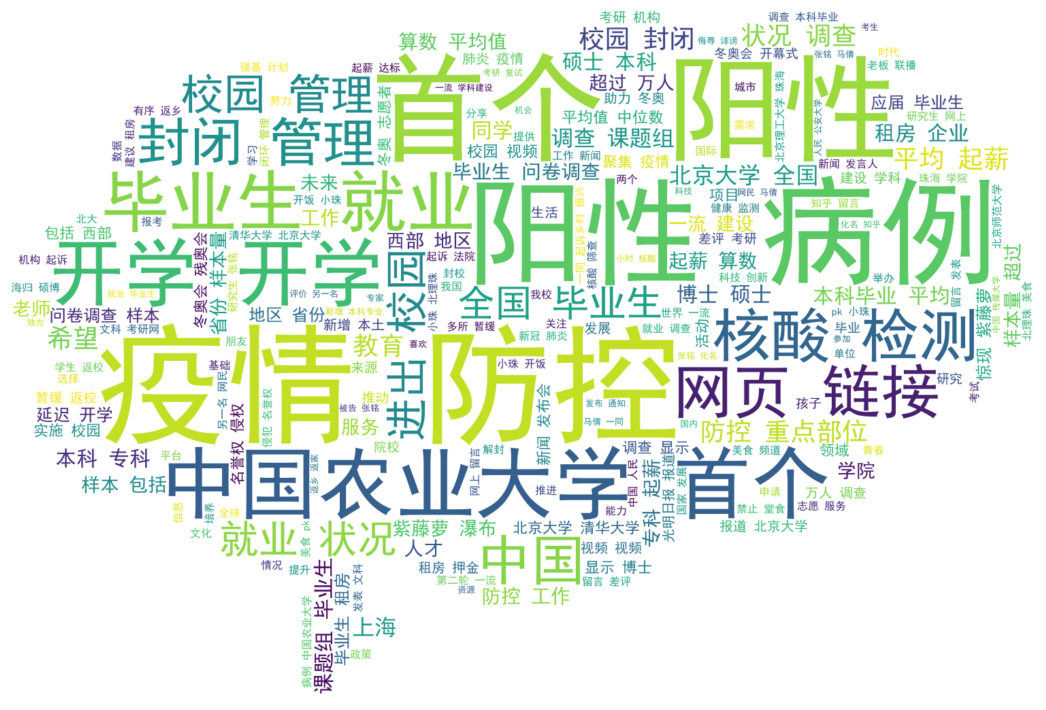

<Figure size 432x288 with 0 Axes>

In [19]:
words = list(df['words'])
text = ' '.join(words)
test_mask = np.array(Image.open('./mask.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("said")

#cloud_words
wc = WordCloud(background_color="white", max_words=200, mask=test_mask,font_path='simhei.ttf',
        stopwords=stopwords)
# generate word cloud
wc.generate(text)
 
# plot and show
plt.figure(figsize=(19.6,12.8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()
 
# store to file
wc.to_file("test_weibo.png")

In [20]:
# 该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
vectorizer = CountVectorizer(max_features=20000)
# 该类会统计每个词语的tf-idf权值
tf_idf_transformer = TfidfTransformer()
# 将文本转为词频矩阵并计算tf-idf
tfidf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(df['words']))
# 获取词袋模型中的所有词语
tfidf_matrix = tfidf.toarray()
# 获取词袋模型中的所有词语
word = vectorizer.get_feature_names()
#print(word)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [21]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)

clusters = km.labels_.tolist()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print(vectorizer.get_stop_words())
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

None
Cluster 0: 冬奥 冬奥会 视频 志愿者 解封 中国 疫情 专业 考研 校园
Cluster 1: 惊现 紫藤萝 瀑布 北大 贵校 名字 词条 标题 不配 姓名
Cluster 2: 文考 张铭 名誉权 起诉 法院 原告 马倩 知乎 评价 留言
Cluster 3: 开学 延迟 返校 延期 北京市教委 刘浩存 通知 在家 河北 多所
Cluster 4: 租房 毕业生 企业 押金 就业 免去 建议 应届 房租 姚洋
Cluster 5: 调查 毕业生 起薪 2021 5825 就业 平均 10113 本科毕业 状况
Cluster 6: 重点部位 防控 疫情 人员 回家 核酸 管理 谢谢 封闭 工作
Cluster 7: 阳性 首个 病例 中国农业大学 cau 助力 农大 核酸 职工 封校
Cluster 8: 管理 校园 进出 封闭 实施 开学 疫情 谢谢 回家 师生员工
Cluster 9: 开学 求求 北京市教委 我要 快点 啥时候 刘浩存 时间 一问 支持


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
df.dropna(inplace = True)
df['words'].to_csv('ouput_weibo.csv',index=False,header=0)

In [23]:
PATH = "ouput_weibo.csv"
num_topics = 7
file_object2=open(PATH,encoding = 'utf-8',errors = 'ignore').read().split('\n')  #一行行的读取内容
data_set=[] #建立存储分词的列表
for i in range(len(file_object2)):
    result=[]
    seg_list = file_object2[i].split()
    for w in seg_list :#读取每一行分词
        result.append(w)
    data_set.append(result)
#print(data_set)
dictionary = corpora.Dictionary(data_set)  # 构建 document-term matrix
corpus = [dictionary.doc2bow(text) for text in data_set]
 
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes = 10,random_state=1)
topic_list=lda.print_topics()
print(topic_list)
 
result_list =[]
for i in lda.get_document_topics(corpus)[:]:
    listj=[]
    for j in i:
        listj.append(j[1])
    bz=listj.index(max(listj))
    result_list.append(i[bz][0])
#print(result_list)
for topic in lda.print_topics(num_topics=num_topics):
    termNumber = topic[0]
    print(topic[0], ':', sep='')
    listOfTerms = topic[1].split('+')
    for term in listOfTerms:
        listItems = term.split('*')
        print('  ', listItems[1], '(', listItems[0], ')', sep='')
df['result'] = result_list[:-1]
df

[(0, '0.024*"专业" + 0.016*"高考" + 0.014*"学科" + 0.013*"招聘" + 0.012*"全国" + 0.012*"一流" + 0.011*"工程" + 0.010*"新增" + 0.010*"招生" + 0.010*"链接"'), (1, '0.009*"发展" + 0.008*"中国" + 0.007*"创新" + 0.006*"教育" + 0.005*"人才" + 0.005*"研究" + 0.005*"工作" + 0.005*"科技" + 0.005*"创业" + 0.005*"建设"'), (2, '0.031*"疫情" + 0.019*"防控" + 0.015*"工作" + 0.015*"管理" + 0.013*"病例" + 0.013*"学生" + 0.012*"阳性" + 0.011*"校园" + 0.011*"中国农业大学" + 0.011*"首个"'), (3, '0.015*"冬奥" + 0.015*"冬奥会" + 0.015*"视频" + 0.014*"中国" + 0.012*"志愿者" + 0.009*"青春" + 0.007*"学院" + 0.006*"未来" + 0.005*"学子" + 0.005*"校园"'), (4, '0.015*"中学" + 0.013*"复试" + 0.010*"考研" + 0.010*"辩论" + 0.009*"招生" + 0.009*"禁止" + 0.008*"北京市" + 0.007*"北京大学" + 0.007*"排名" + 0.006*"清华大学"'), (5, '0.049*"开学" + 0.016*"校园" + 0.012*"管理" + 0.011*"堂食" + 0.010*"解封" + 0.010*"进出" + 0.010*"回家" + 0.008*"毕业" + 0.008*"疫情" + 0.006*"封校"'), (6, '0.062*"毕业生" + 0.046*"就业" + 0.020*"租房" + 0.015*"2021" + 0.012*"调查" + 0.011*"毕业" + 0.011*"紫藤萝" + 0.011*"北京大学" + 0.011*"惊现" + 0.011*"企业"')]
0:
  "专业" (0.024)
  "高考" ( 0.0

,date,content,words,result
0,2022-01-01,2022新年快乐@北京高校联队@捷酷JAKROO@vortex轮组@潘震-自行车教练@战五渣...,新年快乐 联队 捷酷 JAKROO vortex 轮组 潘震 自行车 教练 战五渣 罗雪 t...,4
575,2022-01-01,#北大跨年灯光秀#【2022｜#北京大学跨年晚会#】新年的钟声已经敲响，崭新的篇章已然翻开。...,北大 跨年 灯光 北京大学 跨年 晚会 新年 钟声 敲响 崭新 篇章 已然 翻开 回顾 北京...,3
826,2022-01-01,新的一年不要爱情不要金钱什么我都不要了求求让我在北京高校录取名单上吧我愿意每个初一都去雍和宫...,一年 爱情 金钱 求求 录取名单 初一 雍和宫 烧香 油钱,0
827,2022-01-01,#北京大学跨年晚会#在战火纷飞的年代，有一位特殊的民族脊梁，他以锣鼓为矛、粉墨为盾，与敌人...,北京大学 跨年 晚会 战火纷飞 年代 一位 民族 脊梁 锣鼓 粉墨 为盾 敌人 誓死 抗争 ...,1
828,2022-01-01,元旦@北京高校联队,元旦 联队,3
...,...,...,...,...
4191,2022-06-01,#小兴播报#【快来报名！“未来城市”启航人全球创新挑战赛正式启动】日前，北京大兴国际机场临空...,小兴 播报 报名 未来 城市 启航 全球 创新 挑战赛 正式 启动 日前 大兴 国际 机场 ...,1
4190,2022-06-01,#抗疫北京高校在行动#儿童节快乐和人大志愿者们一起，#过一个有意义的六一#！来源：@中国人民大学,抗疫 儿童节 快乐 人大 志愿者 意义 六一 来源 中国人民大学,5
4189,2022-06-01,【#高考加油#，快来查收北大学长学姐们的祝福！】寒窗十载，披星戴月，#高考倒计时6天#，少年...,高考 加油 查收 学姐 祝福 寒窗 十载 披星戴月 高考 倒计时 少年 以笔 奔赴 战场 听...,3
4187,2022-06-01,1952年，高校院糸调整，浦江清从清华大学调入北京大学。57年暑中，校方按排他去北戴河疗养，...,1952 调整 浦江 清华大学 调入 北京大学 57 年暑 校方 按排 北戴河 疗养 胃部 ...,3


In [24]:
from pyLDAvis import gensim
import pyLDAvis
pyLDAvis.enable_notebook()

'''
lda: 计算好的话题模型

corpus: 文档词频矩阵

dictionary: 词语空间
'''
d = gensim.prepare(lda,corpus,dictionary)
pyLDAvis.display(d)
pyLDAvis.save_html(d, 'lda_weibo.html')

c:\Program Files\Python39\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


In [25]:
df.to_csv("weibo_data.csv")